In [261]:
import math, time, sys, os
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as integrate

In [262]:
mass = 3.8
g = 2
r = 1
phi = np.pi/4
d = 4
s = 1
r = 0.5*d
a = d*np.cos(phi)
sigma = mass/(a**2 - np.pi*s**2)

inertia_G = (1/12)*(sigma*a**2)*(2*a**2) - 0.5*(sigma*np.pi*s**2)*(s**2)
inertia_O = inertia_G + mass*r**2

dt = 0.0001
t0 = 0
t1 = 50
t = np.linspace(t0, t1, round(1+(t1-t0)/dt))
tzero = []

theta0 = -np.pi/3 #Initial angular displacement
omega0 = 0  #Initial angular velocity

print('The moment of inertia around the centroid is {} kg*m^2'.format(inertia_G))
print('The moment of inertia around the point O is {} kg*m^2'.format(inertia_O))

The moment of inertia around the centroid is 7.114328796874494 kg*m^2
The moment of inertia around the point O is 22.31432879687449 kg*m^2


In [263]:
def derrivative(state, t):
    """Takes an array state with entries 0 (angular displacement) and 1 (angular velocity) as input and         outputs an array with velocity and acceleration""" 
    theta = state[0]
    omega = state[1]
    alpha = (-mass*g*r*np.sin(theta))/(inertia_O)
    alpha_lin = (-mass*g*r*theta)/(inertia_O)
    return [omega, alpha]

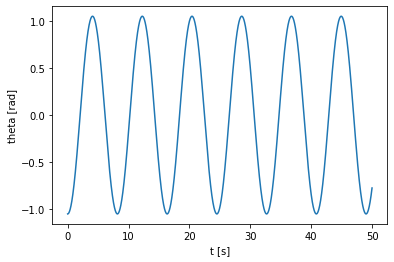

In [264]:
result = integrate.odeint(derrivative, [theta0, omega0], t)
theta_num = result[:,0]
omega_num = result[:,1]

plt.xlabel('t [s]')
plt.ylabel('theta [rad]')
plt.plot(t, theta_num)

In [265]:
for i in range(len(theta_num)):
    if i+1 < len(theta_num) and  np.sign(theta_num[i]) != np.sign(theta_num[i+1]):
        tzero.append(t[i])
print('T = {} s'.format(tzero[2] - tzero[0]))

T = 8.17 s
